In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during generator training
    model = tf.keras.Sequential([generator, discriminator])
    return model


In [ ]:
def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(100,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Reshape((8, 8, 256)),
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='tanh')
    ])
    return model


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Create models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [ ]:
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# Load the dataset
dataset_path = '/content/weed_dataset/Train/images'  # Your path here

dataset = image_dataset_from_directory(dataset_path, image_size=(64, 64), batch_size=32)

# Normalize images to [-1, 1]
def preprocess_image(image):
    image = tf.cast(image, tf.float32)
    image = (image - 127.5) / 127.5  # Normalize to [-1, 1]
    return image

dataset = dataset.map(lambda x, y: (preprocess_image(x), y))


Found 220 files belonging to 1 classes.


In [ ]:
dataset = image_dataset_from_directory('/content/weed_dataset/Train/images', image_size=(128, 128), batch_size=32)


Found 220 files belonging to 1 classes.


In [ ]:
!pip install tensorflow matplotlib


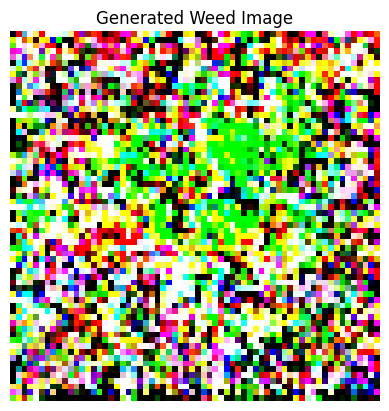

In [ ]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Set to eval mode
netG.eval()

# Generate one image
noise = torch.randn(1, nz, 1, 1, device=device)
fake_image = netG(noise).detach().cpu().squeeze(0)

# Unnormalize from [-1, 1] to [0, 1]
unnorm = transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2])
fake_image = unnorm(fake_image).clamp(0, 1)

# Convert to NumPy for display
plt.imshow(fake_image.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Generated Weed Image")
plt.show()


In [ ]:
# Generator
class Generator(nn.Module):
    def __init__(self, nz, ngf, nc):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, nc, ndf):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nz = 100  # Latent vector (noise) size
ngf = 64  # Generator filters
ndf = 64  # Discriminator filters
nc = 3    # Number of image channels (RGB)

netG = Generator(nz, ngf, nc).to(device)
netD = Discriminator(nc, ndf).to(device)

criterion = nn.BCELoss()
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [ ]:
num_epochs = 400

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        real_images = data[0].to(device)
        b_size = real_images.size(0)
        label_real = torch.full((b_size,), 1., device=device)
        label_fake = torch.full((b_size,), 0., device=device)

        # Train Discriminator
        netD.zero_grad()
        output_real = netD(real_images).view(-1)
        lossD_real = criterion(output_real, label_real)
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake_images = netG(noise)
        output_fake = netD(fake_images.detach()).view(-1)
        lossD_fake = criterion(output_fake, label_fake)
        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()

        # Train Generator
        netG.zero_grad()
        output = netD(fake_images).view(-1)
        lossG = criterion(output, label_real)
        lossG.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/{num_epochs}]  Loss_D: {lossD:.4f}  Loss_G: {lossG:.4f}")

    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
        utils.save_image(fake, f"fake_images_epoch_{epoch+1}.png", normalize=True)


Epoch [1/400]  Loss_D: 0.1505  Loss_G: 4.2887
Epoch [2/400]  Loss_D: 0.8298  Loss_G: 5.8927
Epoch [3/400]  Loss_D: 1.0352  Loss_G: 10.1687
Epoch [4/400]  Loss_D: 0.1011  Loss_G: 4.6533
Epoch [5/400]  Loss_D: 0.1767  Loss_G: 5.5126
Epoch [6/400]  Loss_D: 0.4167  Loss_G: 4.5605
Epoch [7/400]  Loss_D: 0.2317  Loss_G: 4.9064
Epoch [8/400]  Loss_D: 0.2616  Loss_G: 5.7654
Epoch [9/400]  Loss_D: 0.3278  Loss_G: 6.1828
Epoch [10/400]  Loss_D: 0.3388  Loss_G: 6.5926
Epoch [11/400]  Loss_D: 0.3169  Loss_G: 6.7549
Epoch [12/400]  Loss_D: 0.3503  Loss_G: 6.6226
Epoch [13/400]  Loss_D: 1.0260  Loss_G: 11.4235
Epoch [14/400]  Loss_D: 0.1501  Loss_G: 3.5471
Epoch [15/400]  Loss_D: 0.0982  Loss_G: 6.6180
Epoch [16/400]  Loss_D: 0.1750  Loss_G: 4.0782
Epoch [17/400]  Loss_D: 0.2556  Loss_G: 4.5455
Epoch [18/400]  Loss_D: 0.2828  Loss_G: 4.6950
Epoch [19/400]  Loss_D: 0.2736  Loss_G: 5.4810
Epoch [20/400]  Loss_D: 0.2607  Loss_G: 4.4280
Epoch [21/400]  Loss_D: 0.2666  Loss_G: 4.1639
Epoch [22/400]  Loss

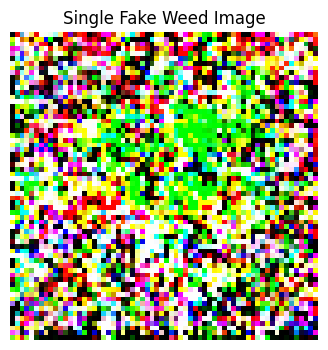

In [ ]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Generate one fake image
netG.eval()  # Set generator to eval mode
noise = torch.randn(1, nz, 1, 1, device=device)  # One random latent vector
fake_img = netG(noise).detach().cpu().squeeze(0)  # Remove batch dimension

# Un-normalize image from [-1, 1] to [0, 1]
unnormalize = transforms.Normalize(
    mean=[-1, -1, -1],
    std=[2, 2, 2]
)
fake_img = unnormalize(fake_img)

# Convert to NumPy and plot
img_np = fake_img.permute(1, 2, 0).clamp(0, 1).numpy()

plt.figure(figsize=(4, 4))
plt.imshow(img_np)
plt.axis("off")
plt.title("Single Fake Weed Image")
plt.show()


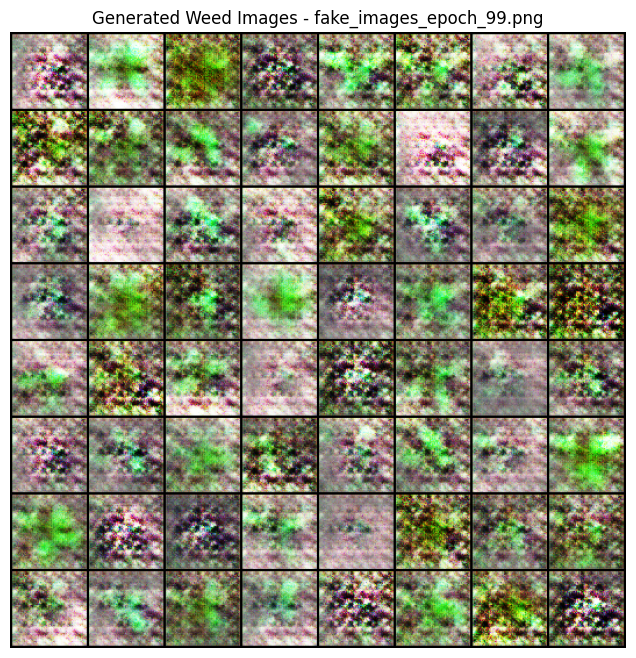

In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils
from PIL import Image
import glob

# Load the latest generated image
image_files = sorted(glob.glob("fake_images_epoch_*.png"))
latest_image = image_files[-1]  # get the last generated image

# Display it
img = Image.open(latest_image)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title(f"Generated Weed Images - {latest_image}")
plt.show()
